In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('./bank_note_data.csv')

In [3]:
data.head(10)

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [20]:
features = list(data.columns)[:-1]
target = list(data.columns)[-1]

In [21]:
print(features)
print(target)

['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy']
Class


In [23]:
data_norm = data.copy()

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_norm[features] = scaler.fit_transform(data_norm[features])

In [25]:
data_norm[features] 

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587
...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996
1368,-0.641313,-1.158984,1.179023,0.730127
1369,-1.472357,-2.621646,3.759017,-0.754884
1370,-1.406693,-1.756471,2.552043,-0.043158


In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=500 , n_components=2)

x_tsne = tsne.fit_transform(data_norm[features])

In [28]:
x_tsne

array([[-28.819801, -25.779907],
       [-26.82279 , -29.37888 ],
       [ 37.071777, -29.899214],
       ...,
       [ 60.413616,  16.214188],
       [ 52.00146 ,  14.781543],
       [ 18.672264,  34.96175 ]], dtype=float32)

In [30]:
target

'Class'

In [32]:
y = data_norm[target]

In [47]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

In [36]:
y.unique()

array([0, 1], dtype=int64)

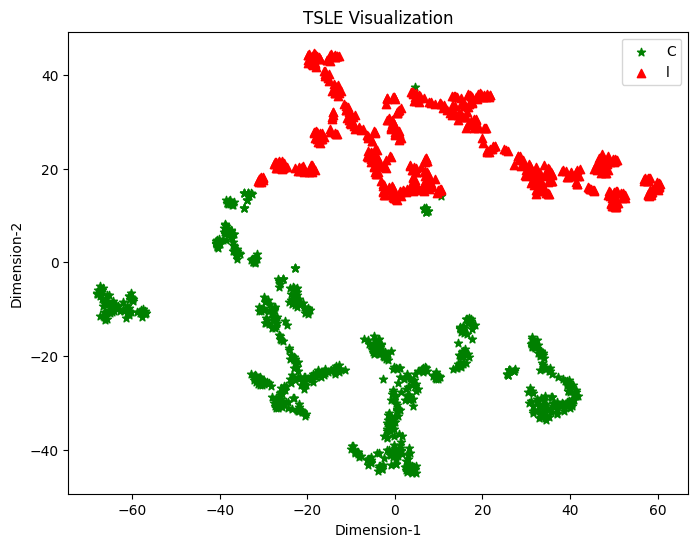

In [45]:
# where y==0 x column will be taken and in that x colun we will take the 0th row

plt.figure(figsize=(8,6))

plt.scatter(x_tsne[np.where(y==0),0],x_tsne[np.where(y==0),1] , c = "g" , marker='*' ) 
plt.scatter(x_tsne[np.where(y==1),0],x_tsne[np.where(y==1),1] , c = "r" , marker='^' ) 
plt.xlabel("Dimension-1")
plt.ylabel("Dimension-2")
plt.title("TSLE Visualization")
plt.legend("Class 0")
plt.show()